In [17]:
from duneanalytics import DuneAnalytics
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath("/home/vincent/devel/vjuge/oc-iml/modules/P2"))
from module_P2_utils import removeOutliers, plotBoxes
# %run ../../P2/module_P2_utils.ipynb


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def query(_query: int):
    dune = DuneAnalytics('altacryptos', 'Password01#')
    dune.login()
    dune.fetch_auth_token()
    # fetch query result id using query id
    # query id for any query can be found from the url of the query:
    # for example:
    # https://dune.com/queries/4494/8769 => 4494
    # https://dune.com/queries/3705/7192 => 3705
    # https://dune.com/queries/3751/7276 => 3751
    result_id = dune.query_result_id(query_id=_query)
    data = dune.query_result(result_id)
    data_reduced = data.get('data').get('get_result_by_result_id')
    # json_object = json.dumps(data_reduced, indent = 4)
    df = pd.json_normalize(data_reduced, sep='_')
    df.drop('__typename', axis=1, inplace=True)
    df.reset_index(inplace=True)
    return df


In [3]:
from pandas import DataFrame
def post_process(df: DataFrame):
    df['data_amount'] = pd.to_numeric(df['data_amount'])
    df['data_amount'] = df['data_amount'] / 1e19
    df['data_evt_block_time'] = pd.to_datetime(df['data_evt_block_time'])
    # print(df.dtypes)
    return df

In [4]:
def save_csv(df, title="dataframe_export.csv"):
    df.to_csv(title+".csv", sep=';')

In [58]:
df_deposit = query(405881)
df_deposit = post_process(df_deposit)
df_deposit.head()

,data_account,data_amount,data_contract_address,data_evt_block_number,data_evt_block_time,data_evt_index,data_evt_tx_hash,data_writeAmount
0,\xfeec05a103f3ee7c4c42ee1d799b39a5b4c62dbf,0.03,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11030068,2020-10-10 21:12:16+00:00,15,\xbf75a59b8da886688f846dbfa2ba7c126e5f7de2eade...,300000000000000000000
1,\x71a5495b8cdcb160c65abae216725ff713507d16,0.50,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11030078,2020-10-10 21:14:27+00:00,39,\x212a857b5fc2668fd4e9394107a98afb65917603991b...,5000000000000000000000
2,\x9e9ddaae1bcfcb13f4f1720b561fed7eb0ad03e0,0.50,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11030078,2020-10-10 21:14:27+00:00,61,\x533d88d28b42477b1a2dbce61d064b16c7a5a96c2415...,5000000000000000000000
3,\x6f9bb7e454f5b3eb2310343f0e99269dc2bb8a1d,1.50,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11030084,2020-10-10 21:15:17+00:00,195,\x12660703a4e0f0627fb77e271f90602b6cba5ef180d4...,15000000000000000000000
4,\x9e9ddaae1bcfcb13f4f1720b561fed7eb0ad03e0,0.40,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11030086,2020-10-10 21:15:45+00:00,112,\x40fca0e812dcda18e86b466a5d3092f4c48f8b0b435e...,4000000000000000000000


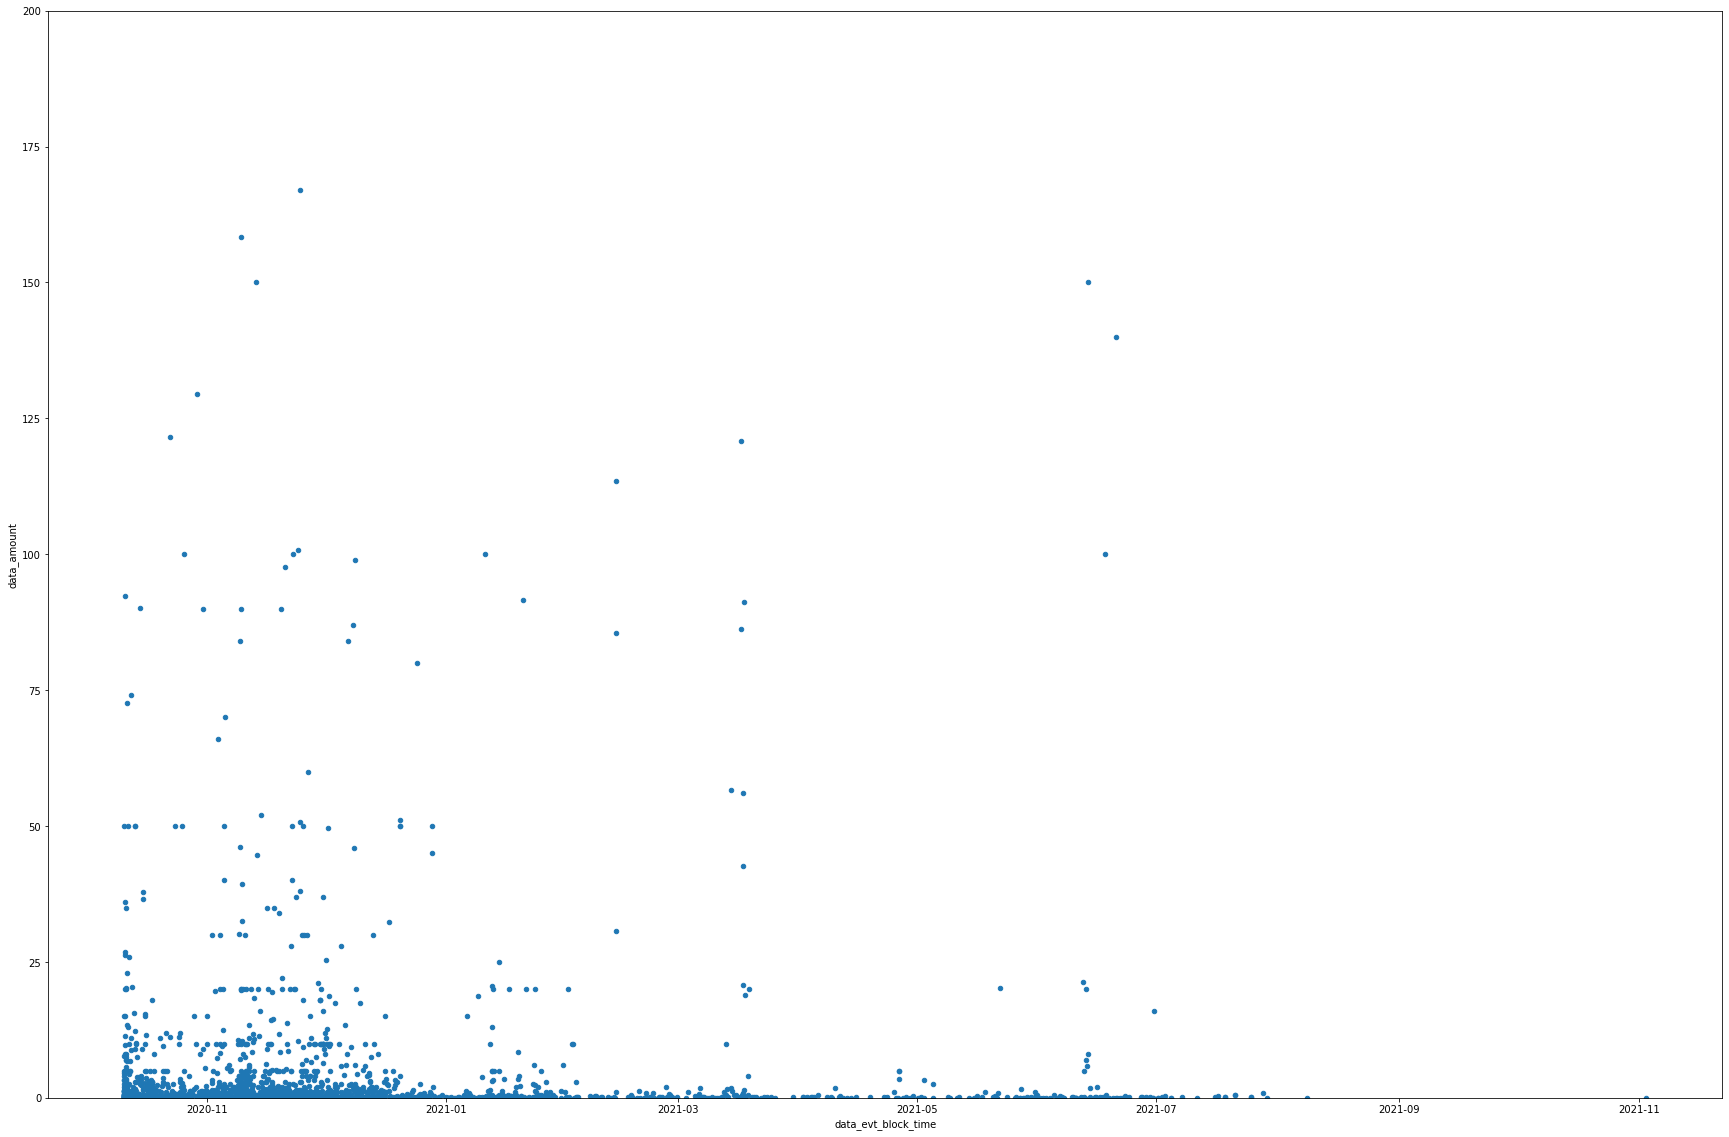

In [66]:
df_deposit.plot(kind='scatter', x='data_evt_block_time',  y='data_amount',  figsize=(30, 20), ylim=(0,200))
save_csv(df_deposit, "hegic_ethpool_deposit")

In [60]:
df_withdraw = query(1227764)
df_withdraw = post_process(df_withdraw)
df_withdraw.head()

,data_account,data_amount,data_contract_address,data_evt_block_number,data_evt_block_time,data_evt_index,data_evt_tx_hash,data_writeAmount
0,\xb49f86d0223437d3e6ce9767e88dfa0413682941,0.100110,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11138219,2020-10-27 11:04:29+00:00,139,\x7054350ca2c733ceb8d9139002c996ff30a47b5fbf05...,999992198330774580666
1,\xcdf703190d949ff1b638b0fb6985dbdc7e62afd9,0.500550,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11138299,2020-10-27 11:21:24+00:00,280,\x2e3ffadf2f8b395dcfc9e4b0325a405673962a41587a...,4999960991653872903327
2,\x3dca07e16b2becd3eb76a9f9ce240b525451f887,3.003287,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11147921,2020-10-28 22:37:27+00:00,43,\x6f93f34fe145108558fa288ad391330a3600735292f8...,29999999722880331064490
3,\x2c2f838f0dac3f4915f4a57f3cb63abcd806ee40,0.300329,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11149514,2020-10-29 04:37:26+00:00,276,\x2cb684c6a644542363b14cbfde881747d06cf6a95d9a...,2999999999999999999060
4,\x7b4778d265f5280f600a2917c6aaf59b44fb2429,8.999900,\x878f15ffc8b894a1ba7647c7176e4c01f74e140b,11149741,2020-10-29 05:26:22+00:00,260,\xd6bcad3577852ac4888aa256f8526ab4a58294ae94ea...,89900246273237077091534


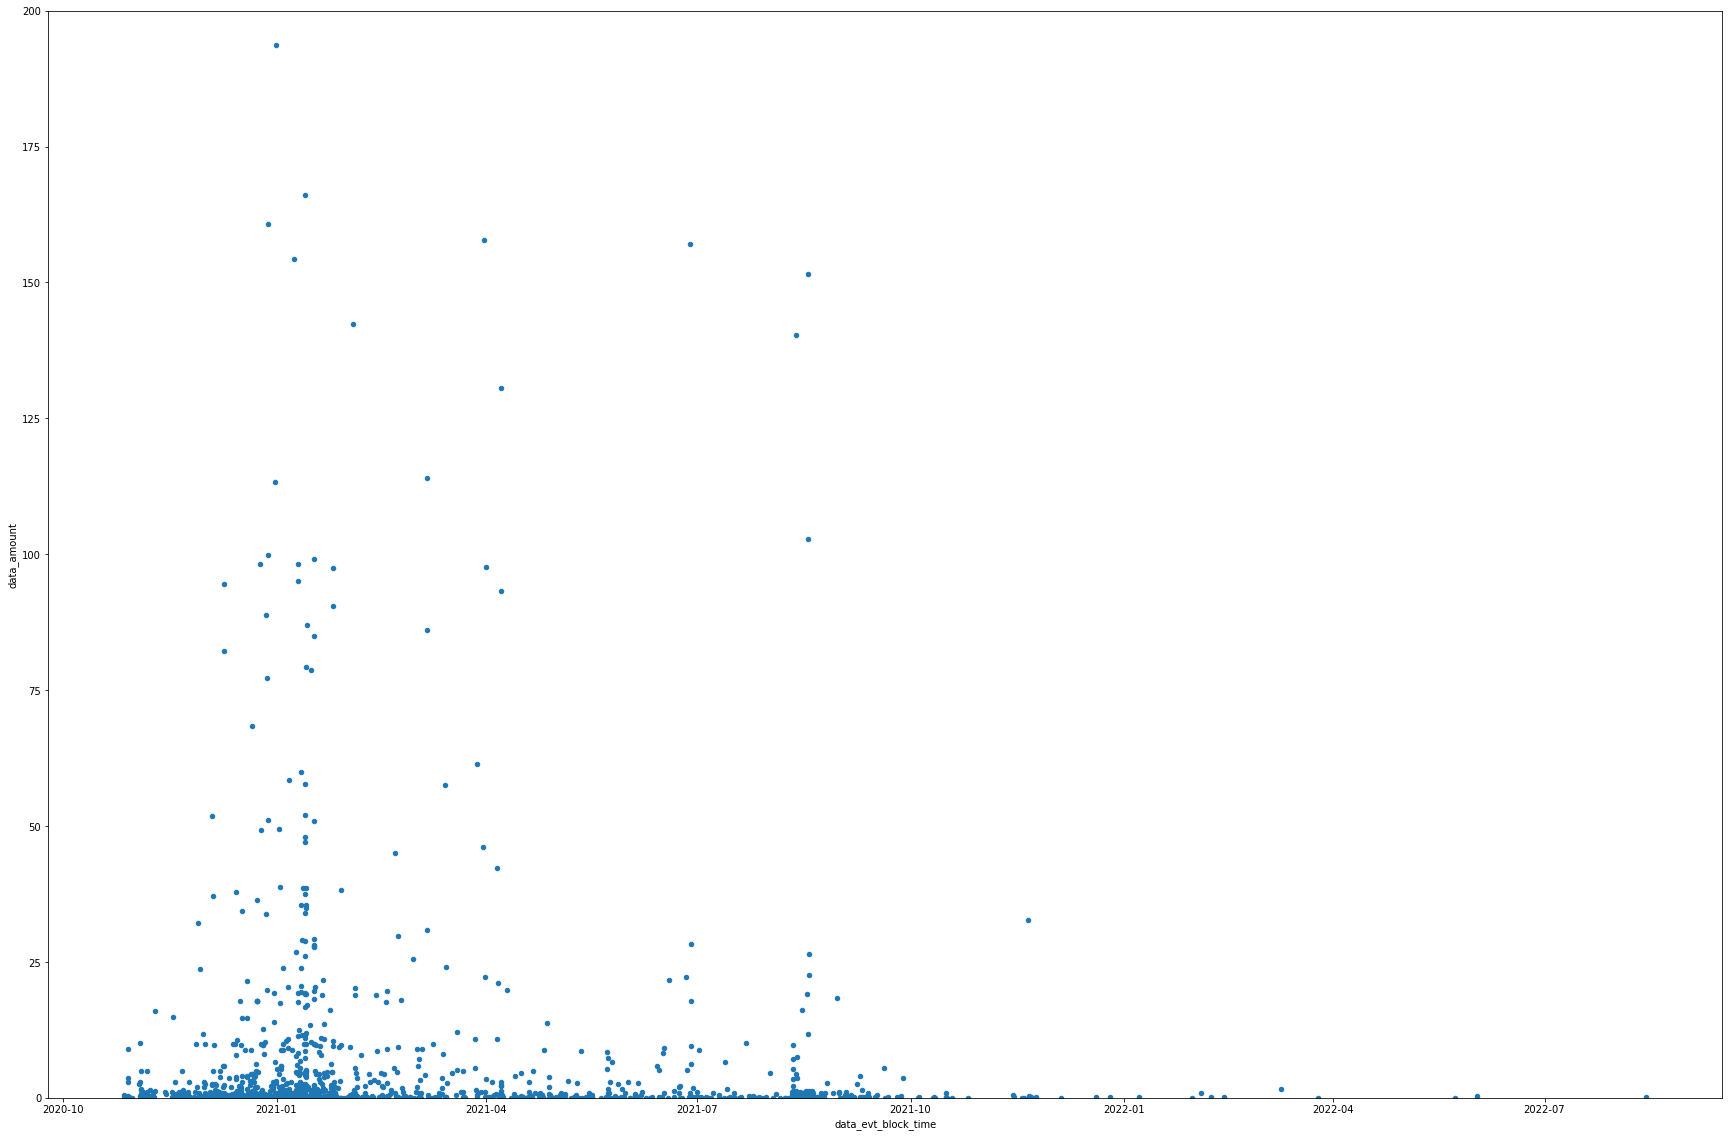

In [65]:
df_withdraw.plot(kind='scatter', x='data_evt_block_time',  y='data_amount',  figsize=(30, 20), ylim=(0,200))
save_csv(df_withdraw, "hegic_ethpool_withdraw")

In [44]:
df_uniswapLiquidityPool = query(1227901)

In [45]:
df_uniswapLiquidityPool['data_call_block_time'] = pd.to_datetime(df_uniswapLiquidityPool['data_call_block_time'])
df_uniswapLiquidityPool = df_uniswapLiquidityPool.astype({
    'data_amountADesired' : 'double',
    'data_amountAMin' : 'double',
    'data_amountBDesired' : 'double',
    'data_amountBMin' : 'double',
    'data_output_amountA' : 'double',
    'data_output_amountB' : 'double',
    'data_output_liquidity' : 'double',
})

In [48]:
df_uniswap_v2 = df_uniswapLiquidityPool[['data_call_block_time', 'data_output_liquidity']]
df_uniswap_v2 = df_uniswap_v2.loc[df_uniswapLiquidityPool.data_call_block_time < '2021-06-01 00:00:00+00:00']


<AxesSubplot:>

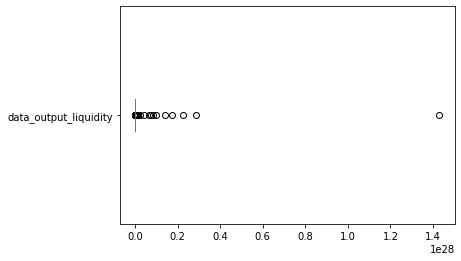

In [49]:
df_uniswap_v2['data_output_liquidity'].plot(kind='box', vert=False)

In [51]:
removeOutliers(df_uniswap_v2, df_uniswap_v2.select_dtypes('float').columns)

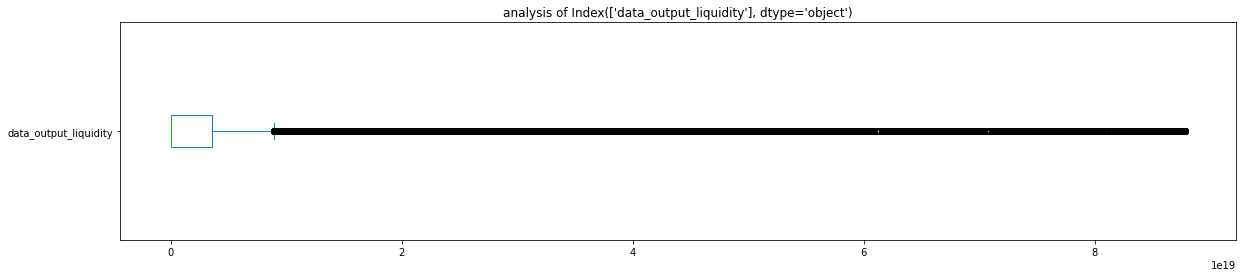

In [52]:
plotBoxes(df_uniswap_v2, df_uniswap_v2.select_dtypes('float').columns)

<AxesSubplot:xlabel='data_call_block_time', ylabel='data_output_liquidity'>

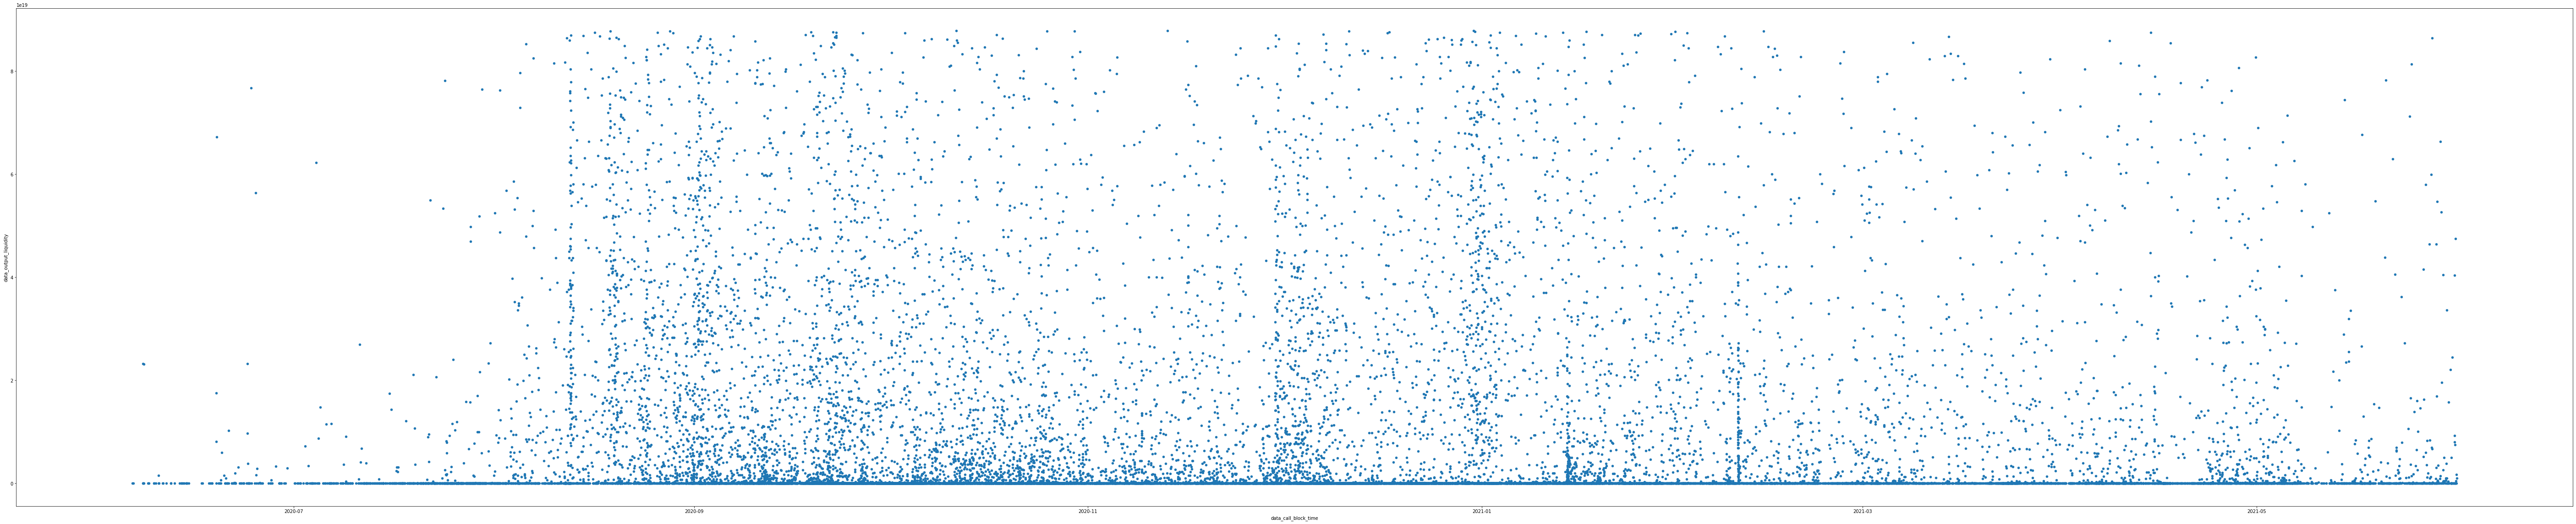

In [53]:
df_uniswap_v2.plot(kind='scatter', x='data_call_block_time',  y='data_output_liquidity',  figsize=(100, 20))


In [54]:
df_uniswapRemoveLiquidityPool = query(1233690)

In [55]:
df_uniswap_v2_remove_liquidity = df_uniswapRemoveLiquidityPool[['data_call_block_time', 'data_liquidity']]

In [57]:
df_uniswap_v2_remove_liquidity['data_call_block_time'] = pd.to_datetime(df_uniswap_v2_remove_liquidity['data_call_block_time'])
df_uniswap_v2_remove_liquidity = df_uniswap_v2_remove_liquidity.astype({
    'data_liquidity' : 'double'
})

/tmp/ipykernel_465946/567813610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uniswap_v2_remove_liquidity['data_call_block_time'] = pd.to_datetime(df_uniswap_v2_remove_liquidity['data_call_block_time'])


In [62]:
removeOutliers(df_uniswap_v2_remove_liquidity, df_uniswap_v2_remove_liquidity.select_dtypes('float').columns)


<AxesSubplot:xlabel='data_call_block_time', ylabel='data_liquidity'>

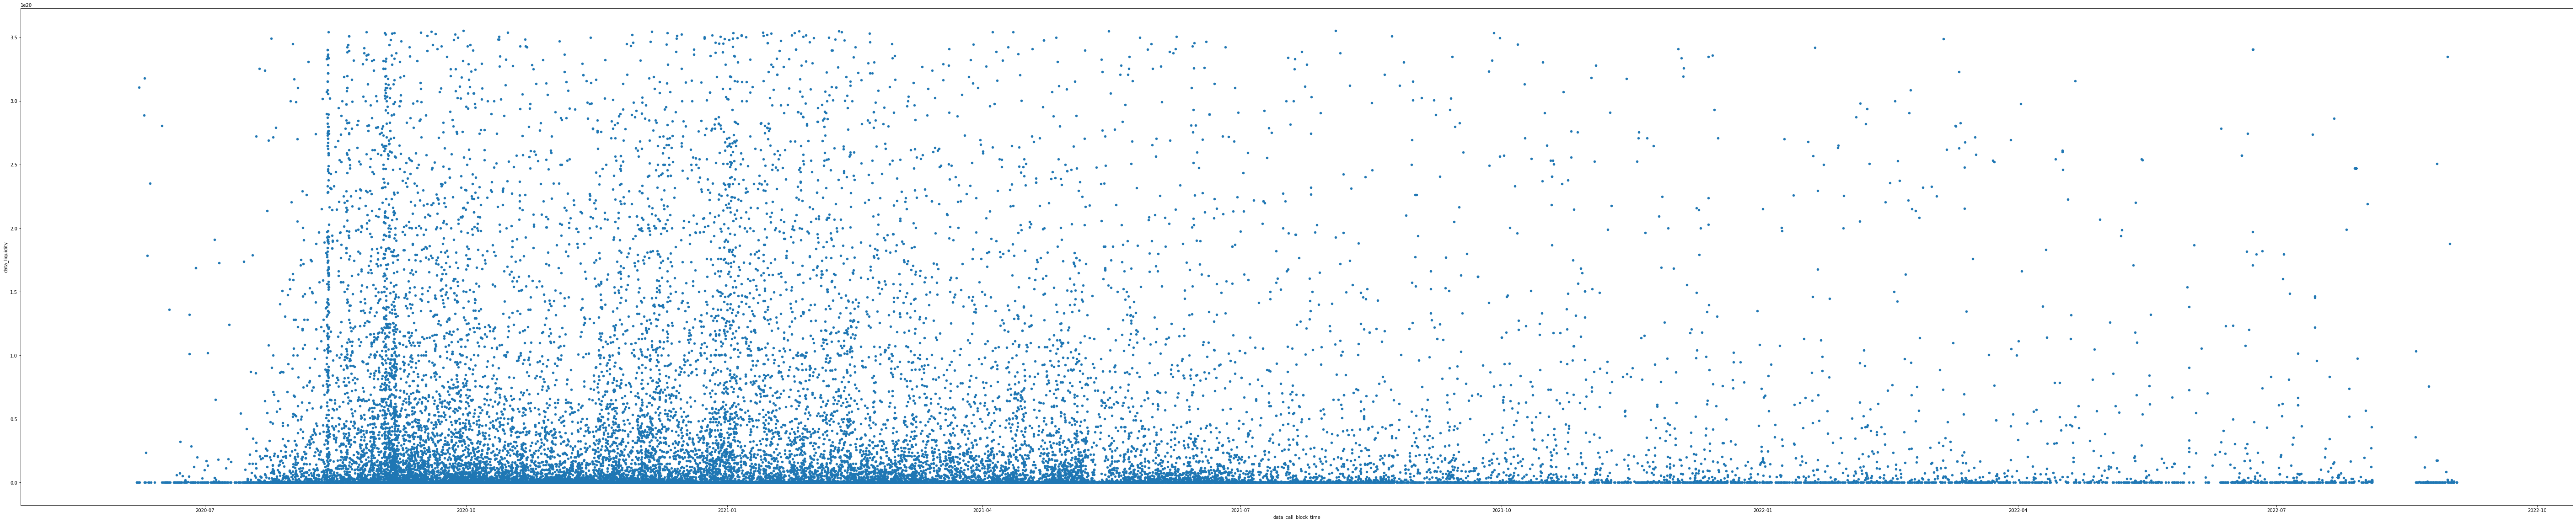

In [63]:
df_uniswap_v2_remove_liquidity.plot(kind='scatter', x='data_call_block_time',  y='data_liquidity',  figsize=(100, 20))


In [64]:
df_uniswap = df_uniswap_v2.merge(df_uniswap_v2_remove_liquidity, 'outer', 'data_call_block_time')

In [66]:
df_uniswap.head(100)

,data_call_block_time,data_output_liquidity,data_liquidity
0,2020-08-17 16:43:15+00:00,1.000000e+17,NaN
1,2020-10-23 10:28:45+00:00,2.159997e+15,NaN
2,2020-12-13 08:10:12+00:00,NaN,NaN
3,2020-12-16 08:49:29+00:00,NaN,NaN
4,2020-11-30 22:16:44+00:00,8.301685e+13,NaN
...,...,...,...
95,2020-12-06 11:12:38+00:00,4.068924e+13,NaN
96,2020-10-02 03:59:16+00:00,6.259035e+13,NaN
97,2020-09-04 23:42:24+00:00,NaN,NaN
98,2020-12-21 14:20:58+00:00,NaN,NaN


In [79]:
df_uniswap.fillna(0, inplace=True)

In [80]:
df_uniswap['liquidity']= df_uniswap['data_output_liquidity'] - df_uniswap['data_liquidity']

In [83]:
df_uniswap['inout'] = df_uniswap['liquidity'].cumsum()

In [88]:
df_uniswap


,data_call_block_time,data_output_liquidity,data_liquidity,liquidity,inout
0,2020-08-17 16:43:15+00:00,1.000000e+17,0.000000e+00,1.000000e+17,1.000000e+17
1,2020-10-23 10:28:45+00:00,2.159997e+15,0.000000e+00,2.159997e+15,1.021600e+17
2,2020-12-13 08:10:12+00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.021600e+17
3,2020-12-16 08:49:29+00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.021600e+17
4,2020-11-30 22:16:44+00:00,8.301685e+13,0.000000e+00,8.301685e+13,1.022430e+17
...,...,...,...,...,...
91622,2020-12-12 00:26:20+00:00,0.000000e+00,1.586602e+17,-1.586602e+17,-8.904098e+23
91623,2021-05-10 06:29:56+00:00,0.000000e+00,7.890375e+19,-7.890375e+19,-8.904887e+23
91624,2020-12-06 09:18:03+00:00,0.000000e+00,2.644863e+19,-2.644863e+19,-8.905151e+23
91625,2021-03-07 18:26:43+00:00,0.000000e+00,6.683360e+18,-6.683360e+18,-8.905218e+23


In [81]:
df_uniswap.head()

,data_call_block_time,data_output_liquidity,data_liquidity,liquidity
0,2020-08-17 16:43:15+00:00,1.000000e+17,0.0,1.000000e+17
1,2020-10-23 10:28:45+00:00,2.159997e+15,0.0,2.159997e+15
2,2020-12-13 08:10:12+00:00,0.000000e+00,0.0,0.000000e+00
3,2020-12-16 08:49:29+00:00,0.000000e+00,0.0,0.000000e+00
4,2020-11-30 22:16:44+00:00,8.301685e+13,0.0,8.301685e+13


<AxesSubplot:xlabel='data_call_block_time'>

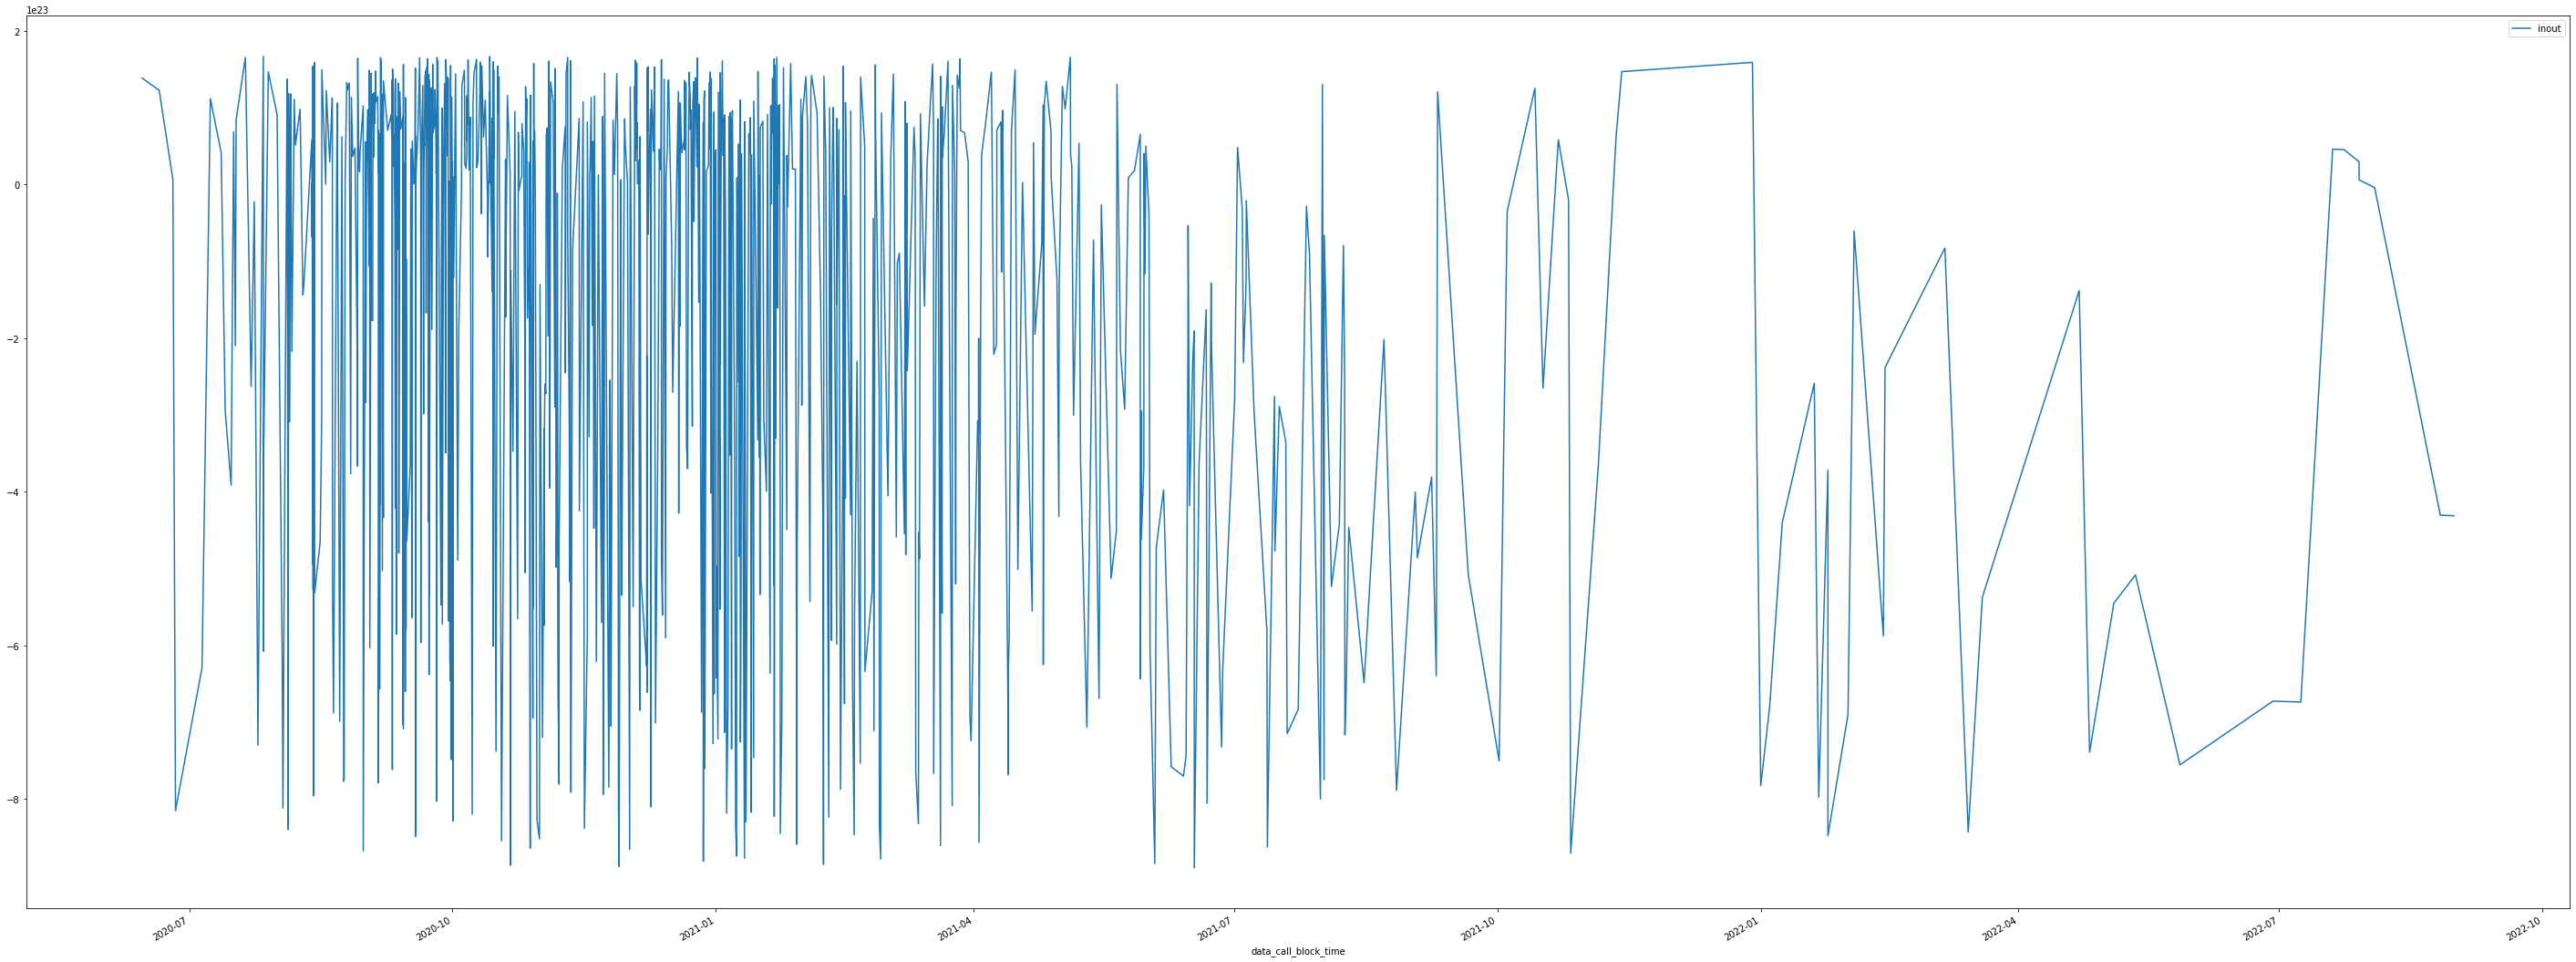

In [98]:
df_uniswap[::100].plot(kind='line', x='data_call_block_time',  y=['inout'],  figsize=(50, 20))
